In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [7]:
df = df.rename(columns=({'3.159499363321345566e-02':'X'}))

In [8]:
df.head()

,X,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [9]:
df = df.rename(columns=({'9.869877579082642072e-01':'Y'}))

In [10]:
df = df.rename(columns=({'0.000000000000000000e+00':'class'}))

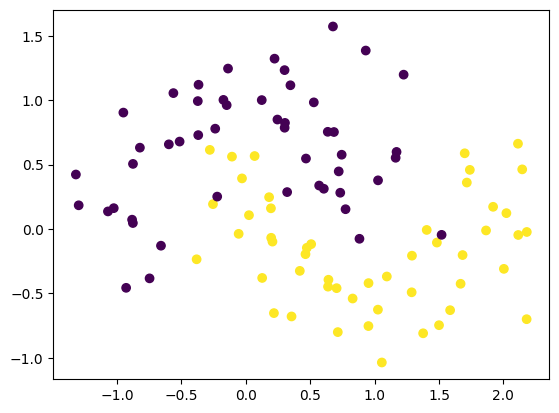

In [11]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [12]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Set parameters to 0
model.get_weights()

[array([[ 0.55588776, -0.0502854 ,  0.05450988, -0.46653444, -0.6723781 ,
         -0.6342794 , -0.11677998, -0.3648103 , -0.6441097 , -0.21047309],
        [-0.0791319 , -0.4865803 , -0.62879086,  0.5044531 ,  0.21880114,
         -0.4028539 , -0.265076  ,  0.3946938 , -0.63377935, -0.05837256]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6028901 ],
        [-0.24823904],
        [ 0.39646322],
        [ 0.37261897],
        [-0.6605998 ],
        [-0.48172492],
        [-0.48796234],
        [ 0.37649304],
        [ 0.5997636 ],
        [ 0.6919307 ]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
initial_weights=model.get_weights()

In [18]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 113ms/step - loss: 0.6931 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [23]:
model.get_weights()

[array([[ 0.44809034,  0.44809034,  0.44809034,  0.44809034,  0.44809037,
          0.44809037,  0.44809037,  0.44809037,  0.44809037,  0.44809037],
        [-0.48354915, -0.48354915, -0.48354915, -0.48354915, -0.48354915,
         -0.48354915, -0.48354915, -0.48354915, -0.48354915, -0.48354915]],
       dtype=float32),
 array([-0.13919258, -0.13919258, -0.13919258, -0.13919258, -0.13919258,
        -0.13919258, -0.13919258, -0.13919258, -0.13919258, -0.13919258],
       dtype=float32),
 array([[0.0611111 ],
        [0.0611111 ],
        [0.0611111 ],
        [0.0611111 ],
        [0.06111111],
        [0.06111111],
        [0.06111111],
        [0.06111111],
        [0.06111111],
        [0.06111111]], dtype=float32),
 array([-0.06799123], dtype=float32)]

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

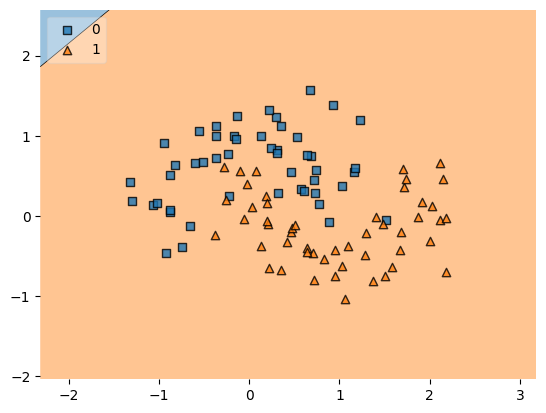

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)